In [48]:
# -----------------------------
#  Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style="whitegrid")
%matplotlib inline

# -----------------------------
#  Project Overview
# -----------------------------
"""
# E-commerce Sales Analysis on Amazon

## Problem Statement
The goal of this project is to analyze Amazon products to understand product popularity, category performance, customer engagement, and insights from customer reviews.

## Objective
- Identify top products and categories based on ratings and reviews
- Analyze customer feedback through reviews
- Understand reviewer behavior and engagement
- Provide actionable insights for e-commerce stakeholders
"""

In [33]:
# -----------------------------
#  Load Dataset
# -----------------------------
df = pd.read_csv("/content/amazonsalesdataset.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [36]:
# -----------------------------
#  Data Cleaning
# -----------------------------
# Standardize column names
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "").str.replace("-", "")

# Fill missing rating_count with median
df['rating_count'] = df['rating_count'].fillna(df['rating_count'].median())

# Ensure numeric columns are correct
numeric_cols = ['rating', 'rating_count']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

In [35]:
numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

for col in numeric_cols:
    # Step 1: Convert to string (safety)
    df[col] = df[col].astype(str)

    # Step 2: Remove commas, currency symbols, spaces
    df[col] = df[col].str.replace(',', '', regex=True)
    df[col] = df[col].str.replace('₹', '', regex=True)  # if any currency symbols exist
    df[col] = df[col].str.strip()

    # Step 3: Convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Step 4: Fill remaining NaNs with 0 or median
    df[col] = df[col].fillna(df[col].median())

# Check if cleaning worked
df[numeric_cols].head(10)
df[numeric_cols].describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,0.0,1465.000000,1465.000000
mean,3125.310874,5444.990635,NaN,4.096587,18277.634812
std,6944.304394,10874.826864,NaN,0.291574,42727.398216
min,39.000000,39.000000,NaN,2.000000,2.000000
25%,325.000000,800.000000,NaN,4.000000,1191.000000
50%,799.000000,1650.000000,NaN,4.100000,5179.000000
75%,1999.000000,4295.000000,NaN,4.300000,17325.000000
max,77990.000000,139900.000000,NaN,5.000000,426973.000000


In [37]:
# -----------------------------
#  Basic Overview
# -----------------------------
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  0 non-null      float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465.000000,1465.000000,0.0,1465.000000,1465.000000,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,NaN,NaN,NaN,NaN,NaN,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,NaN,NaN,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,NaN,NaN,NaN,NaN,NaN,6,10,10,10,10,8,3,1
mean,NaN,NaN,NaN,3125.310874,5444.990635,NaN,4.096587,18277.634812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,6944.304394,10874.826864,NaN,0.291574,42727.398216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,39.000000,39.000000,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,325.000000,800.000000,NaN,4.000000,1191.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,799.000000,1650.000000,NaN,4.100000,5179.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1999.000000,4295.000000,NaN,4.300000,17325.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipython-input-3583025146.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviewed_products.values, y=top_reviewed_products.index, palette='viridis')


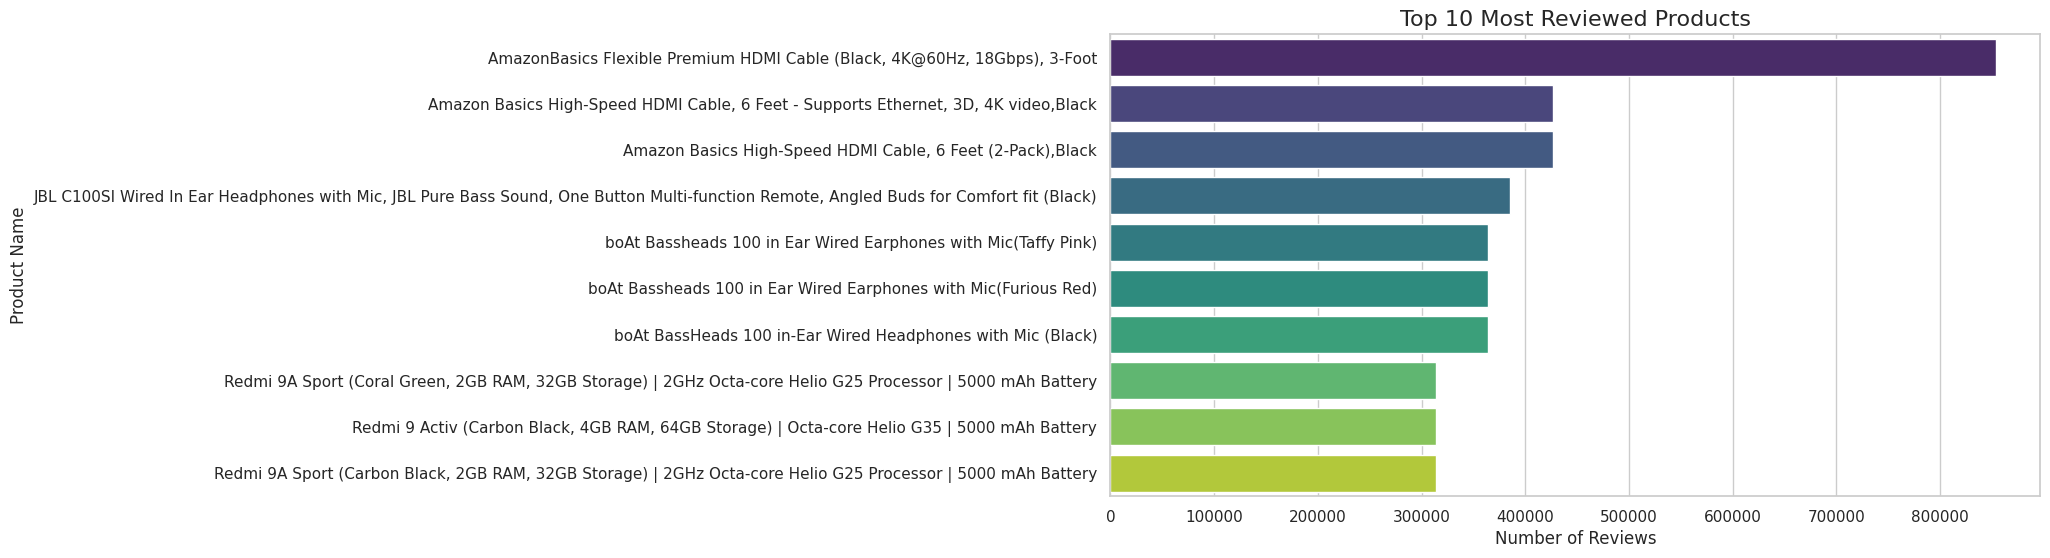

/tmp/ipython-input-3583025146.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_products.values, y=top_rated_products.index, palette='coolwarm')


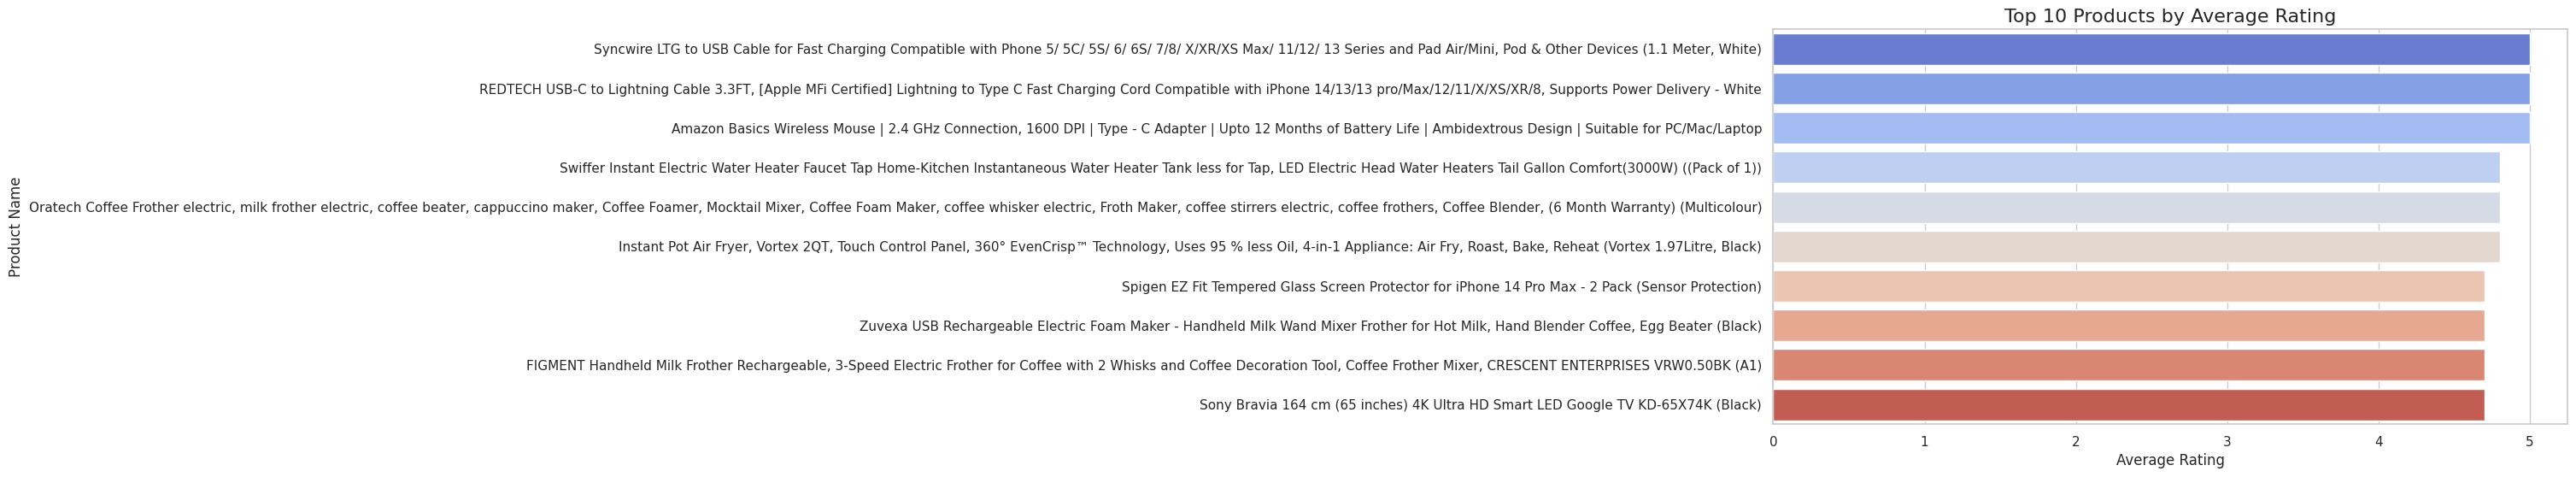

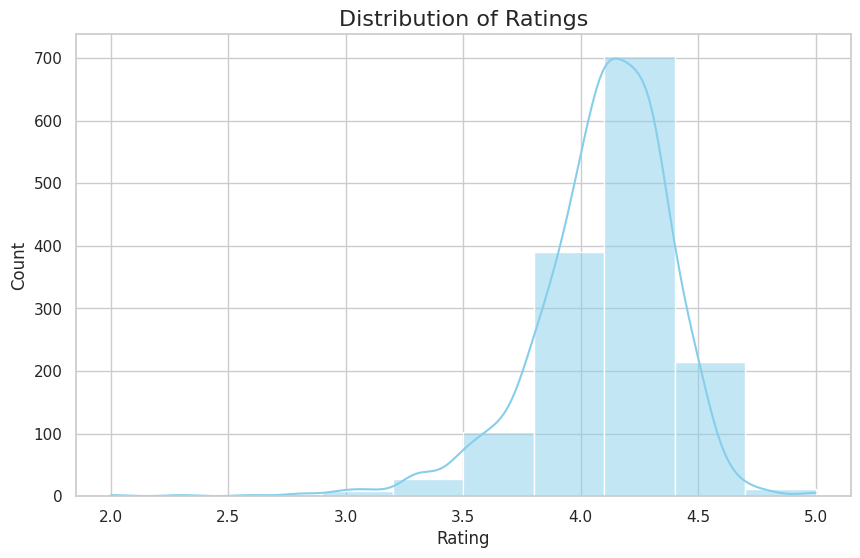

In [38]:
# -----------------------------
# Sales Analysis (Proxies)
# -----------------------------
# Top 10 Products by Number of Reviews
top_reviewed_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_reviewed_products.values, y=top_reviewed_products.index, palette='viridis')
plt.title("Top 10 Most Reviewed Products", fontsize=16)
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.show()

# Average Rating per Product (Top 10)
top_rated_products = df.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_rated_products.values, y=top_rated_products.index, palette='coolwarm')
plt.title("Top 10 Products by Average Rating", fontsize=16)
plt.xlabel("Average Rating")
plt.ylabel("Product Name")
plt.show()

# Ratings Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Ratings", fontsize=16)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-679190165.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_products.values, y=top_rated_products.index, palette='coolwarm')


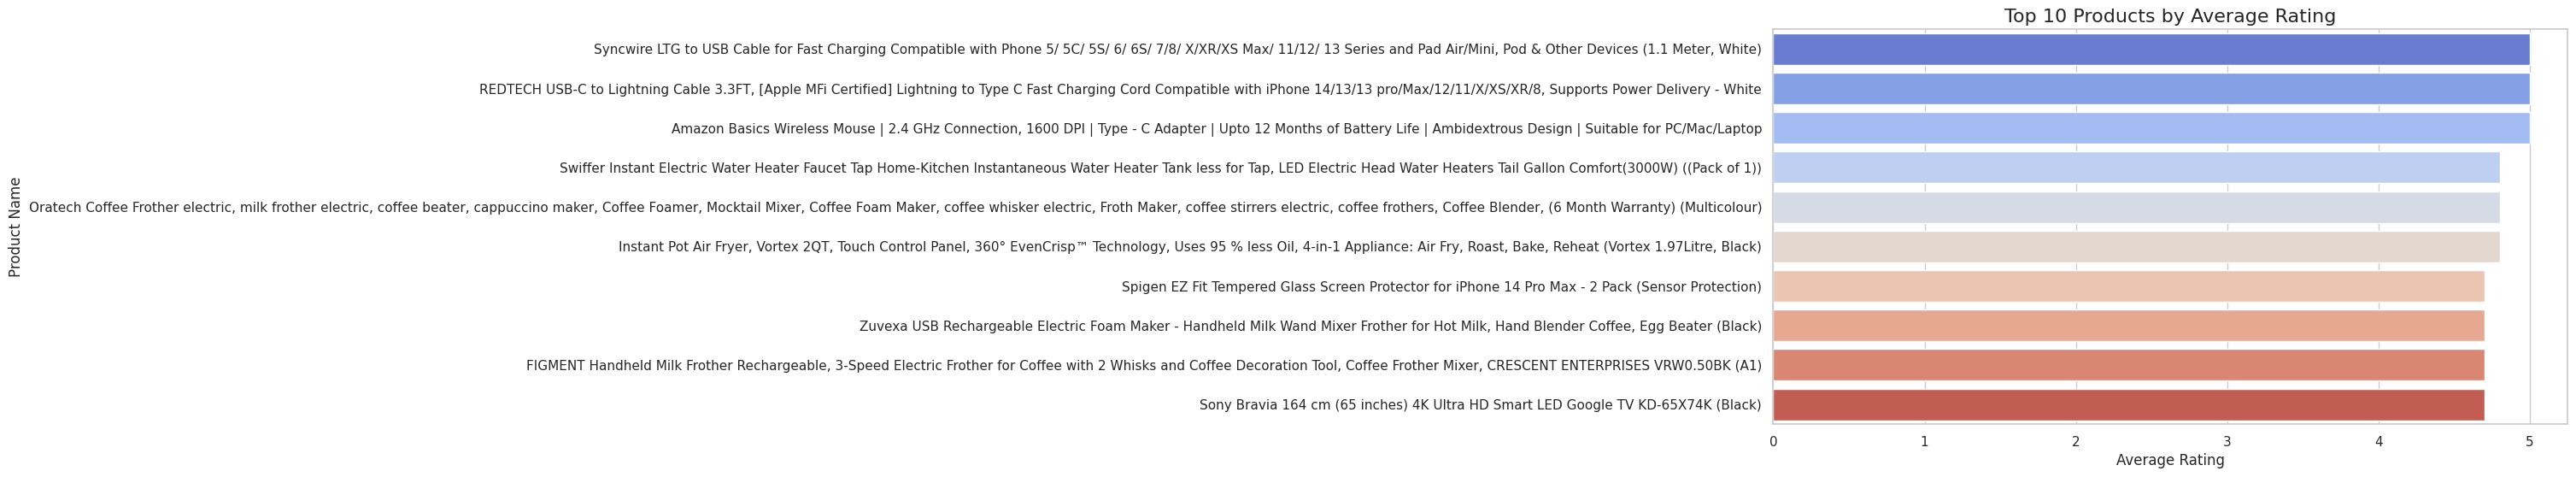

In [39]:
# Average Rating per Product (Top 10)
top_rated_products = df.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_rated_products.values, y=top_rated_products.index, palette='coolwarm')
plt.title("Top 10 Products by Average Rating", fontsize=16)
plt.xlabel("Average Rating")
plt.ylabel("Product Name")
plt.show()

/tmp/ipython-input-1366579808.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


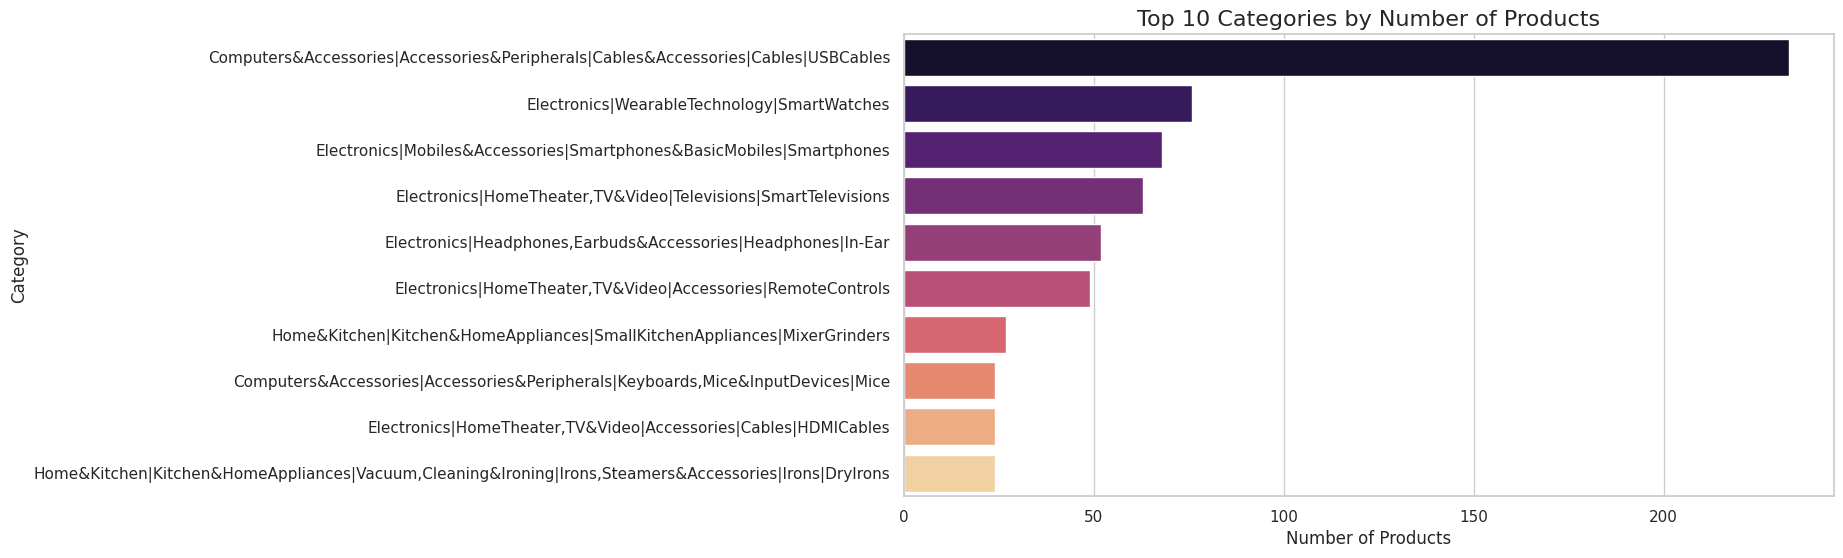

/tmp/ipython-input-1366579808.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


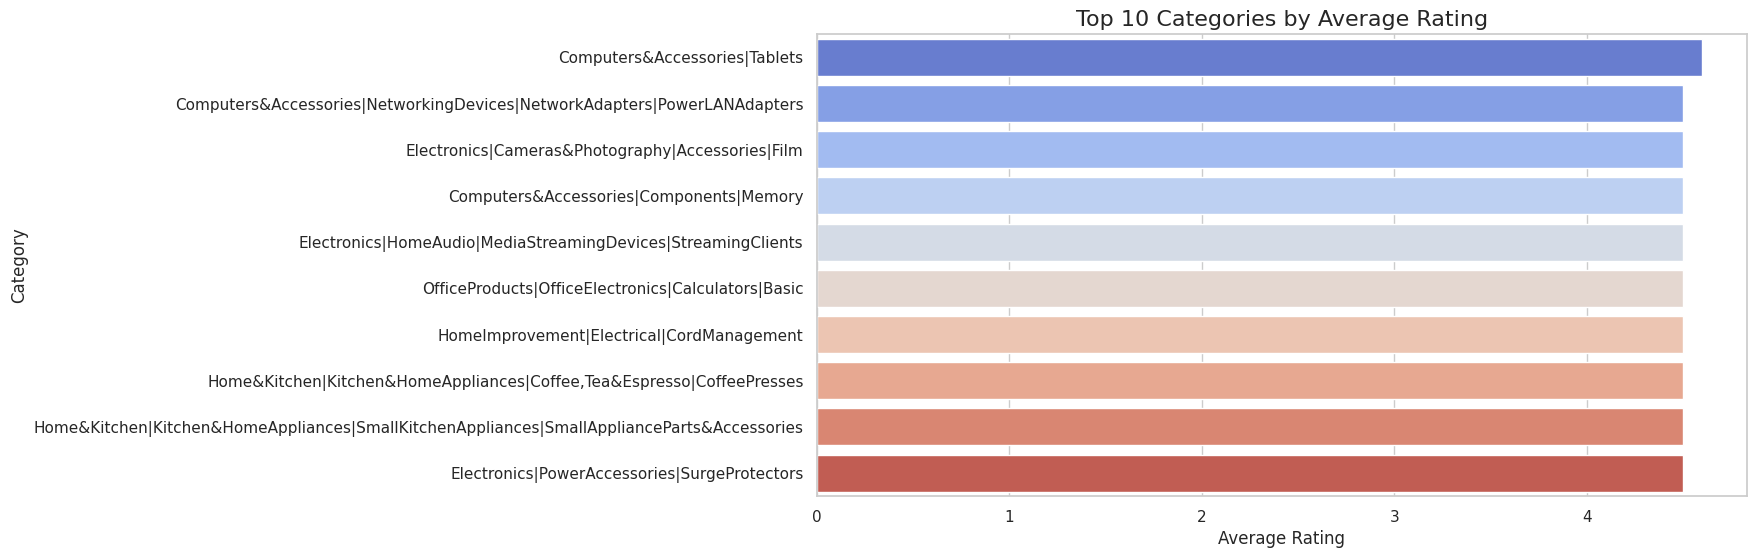

In [42]:
# Top 10 categories by number of products
top_categories = df['category'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    palette='magma'
)
plt.title("Top 10 Categories by Number of Products", fontsize=16)
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.show()

# Top 10 categories by average rating
category_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(
    x=category_rating.values,
    y=category_rating.index,
    palette='coolwarm'
)
plt.title("Top 10 Categories by Average Rating", fontsize=16)
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()

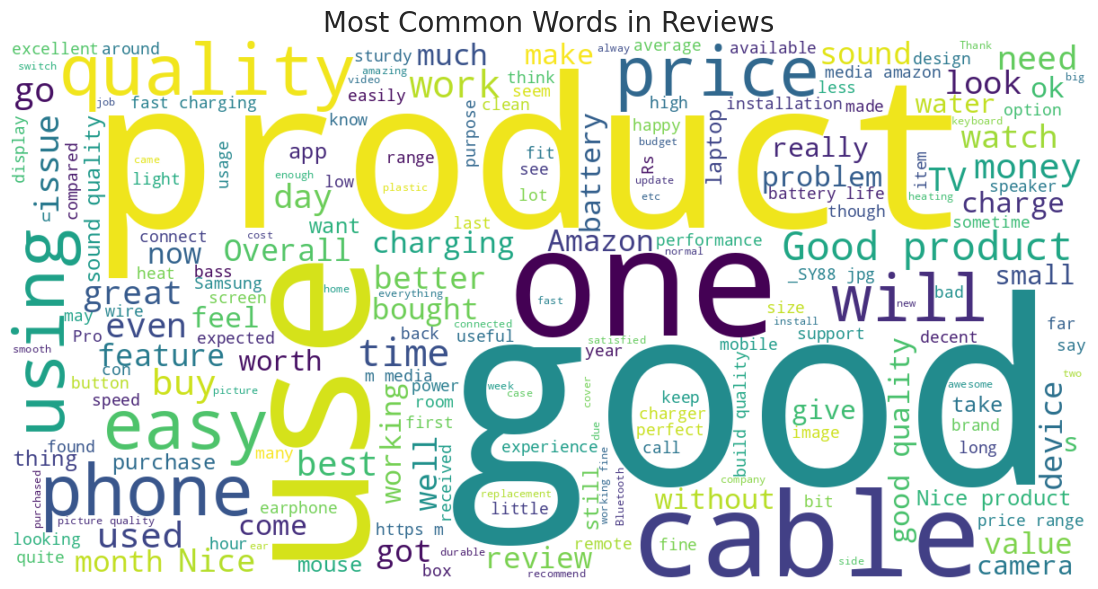

In [43]:
# Combine all review content into a single string
reviews_text = " ".join(df['review_content'].dropna().astype(str))

# Generate Word Cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    max_words=200
).generate(reviews_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews", fontsize=20)
plt.show()

/tmp/ipython-input-2442415215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2358 (\N{DEVANAGARI LETTER SHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

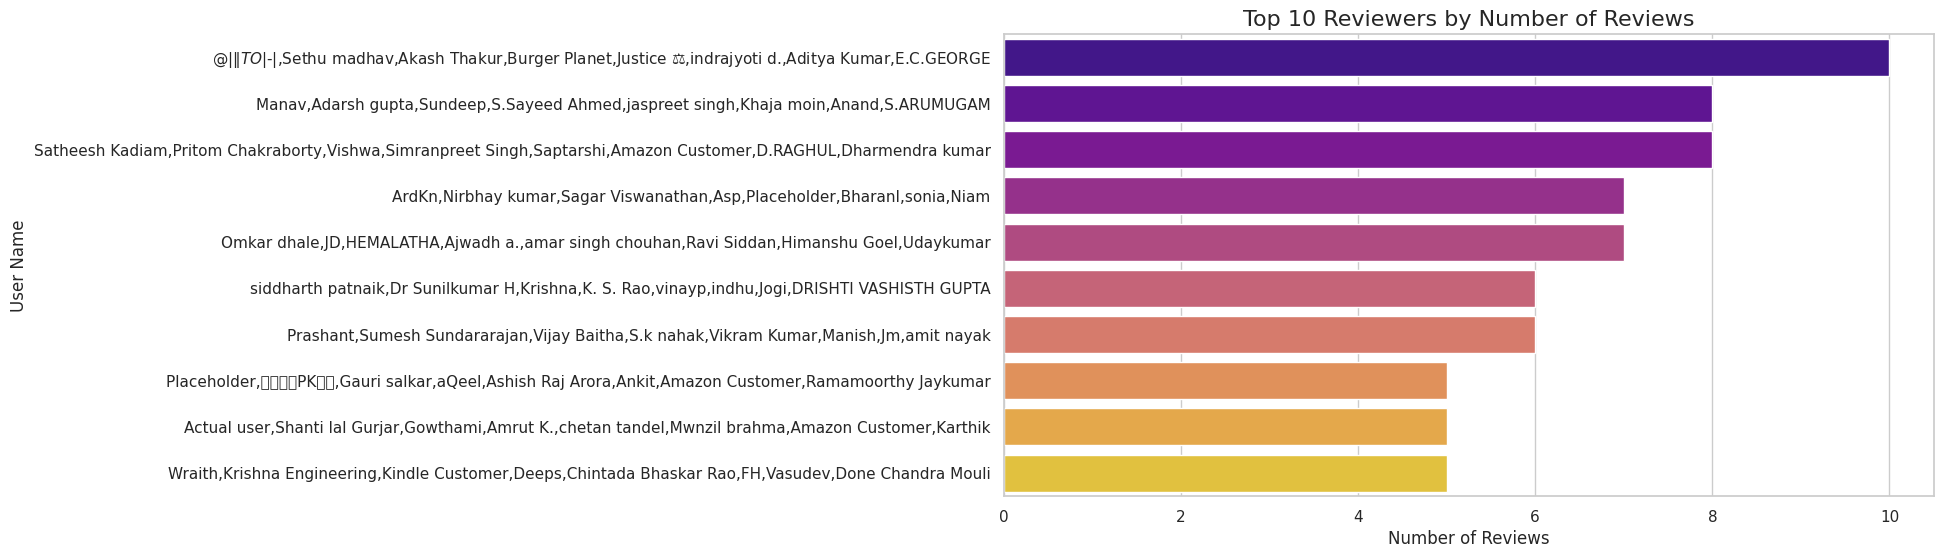

In [44]:
top_users = df['user_name'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_users.values,
    y=top_users.index,
    palette='plasma'
)
plt.title("Top 10 Reviewers by Number of Reviews", fontsize=16)
plt.xlabel("Number of Reviews")
plt.ylabel("User Name")
plt.show()

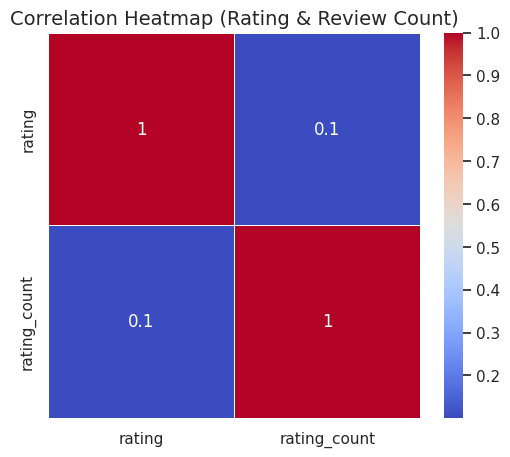

In [45]:
plt.figure(figsize=(6,5))
sns.heatmap(
    df[['rating','rating_count']].corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Correlation Heatmap (Rating & Review Count)", fontsize=14)
plt.show()

In [47]:
# -----------------------------
#  Save Cleaned Dataset
# -----------------------------
df.to_csv("/content/cleaned_amazonsales_analysis.csv", index=False)

# -----------------------------
#  Insights & Conclusion
# -----------------------------
"""
# Insights

1. Top-reviewed products indicate high popularity (proxy for sales)  
2. Categories with higher average ratings are performing well in customer satisfaction  
3. Most common words in reviews highlight what customers value most  
4. Reviewer engagement shows which customers are most active  
5. Correlation between rating and review count shows patterns of product popularity  

# Conclusion
This analysis provides actionable insights into Amazon product performance, customer satisfaction, and engagement trends. Even without revenue data, the findings reflect key aspects of e-commerce sales performance"""